__Домашняя работа 2.__

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn.linear_model import Ridge
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [3]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [4]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

__Задание 1.__ Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [5]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

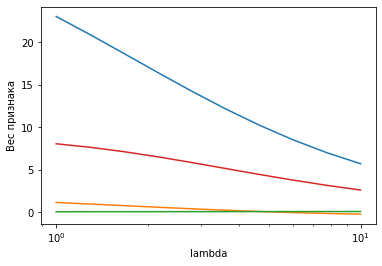

In [6]:
n = 10

coeffs = np.zeros((n, X.shape[1]))
lambda_list = np.logspace(start=1e-8, stop=1, num=n)

for i, val in enumerate(lambda_list):
    ridge = Ridge(alpha=val, fit_intercept=False)
    ridge.fit(X, y)
    
    coeffs[i, :] = ridge.coef_#.flatten() Зачем нужен flatten?

for i in range(X.shape[1]):
    plt.semilogx(lambda_list, coeffs[:, i])


plt.xlabel('lambda')
plt.ylabel('Вес признака');

С ростом параметра lambda веса уменьшаются. Самостоятельно написать ridge не получилось

__Задание 2.__ Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [7]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if iterations %10 == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

__Задание 3.__ *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Можно, но последняя затрет первую. Имеет значение только что было применено последним

__Задание 4.__ *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [8]:
# сгенерируем набор данных
X, Y, coef = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=4)
X[:, 0] *= 10
print(X.shape)

(1000, 2)


In [9]:
def gradient_descent(X, y, iterations, eta=1e-4, errors = []):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        errors.append(err)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [10]:
def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-4, errors = []):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'amount of batches is {n_batch}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            start = batch_size * b
            end = batch_size * (b + 1)
            
#             print(b, start, end)
            
            X_tmp = X[start : end, ]
            y_tmp = y[start : end]

            err = calc_mse(y, np.dot(X, W))
            errors.append(err)
            y_pred_tmp = np.dot(X_tmp, W)
            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [11]:
X_st = X.copy().astype(np.float64)
X_st[:, 0] = standard_scale(X_st[:, 0])
X_st[:, 1] = standard_scale(X_st[:, 1])

In [12]:
g_errors = []
gradient_descent(X_st, Y, iterations=300, eta=1e-2, errors=g_errors)

Iter: 0, weights: [-0.01901327 -1.25175818], error 2857.319033728854
Iter: 30, weights: [23.57606316  0.47545649], error 876.7181426257051
Iter: 60, weights: [36.47800487  1.77776813], error 281.81108155279617
Iter: 90, weights: [43.53832755  2.68516103], error 102.58312966035855
Iter: 120, weights: [47.40491347  3.28797522], error 48.428596950417756
Iter: 150, weights: [49.52406388  3.67588436], error 32.01900180302441
Iter: 180, weights: [50.68637871  3.91987628], error 27.033018462962524
Iter: 210, weights: [51.32436313  4.07074376], error 25.51406344382229
Iter: 240, weights: [51.67480553  4.16279892], error 25.05015995852469
Iter: 270, weights: [51.86744224  4.21837622], error 24.90814185369924
Final MSE: 24.864566991603006


array([51.97080192,  4.2507881 ])

In [17]:
st_errors = []
stohastic_gradient_descent(X_st, Y, iterations=50, batch_size=1, eta=1e-2, errors=st_errors)

amount of batches is 1000
Iter: 0, weights: [52.38430816  3.75833789], error 25.376212596254305
Iter: 5, weights: [52.38430824  3.75833794], error 25.376212594264004
Iter: 10, weights: [52.38430824  3.75833794], error 25.376212594264004
Iter: 15, weights: [52.38430824  3.75833794], error 25.376212594264004
Iter: 20, weights: [52.38430824  3.75833794], error 25.376212594264004
Iter: 25, weights: [52.38430824  3.75833794], error 25.376212594264004
Iter: 30, weights: [52.38430824  3.75833794], error 25.376212594264004
Iter: 35, weights: [52.38430824  3.75833794], error 25.376212594264004
Iter: 40, weights: [52.38430824  3.75833794], error 25.376212594264004
Iter: 45, weights: [52.38430824  3.75833794], error 25.376212594264004
Final MSE: 25.230852933752157


array([52.38430824,  3.75833794])

Text(0, 0.5, 'MSE')

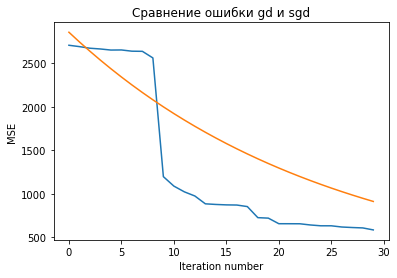

In [24]:
n = 30 # взял только первые 30 элементов, иначе скачков sgd не заметно из-за очень большого количества итераций
plt.plot(range(len(st_errors[:n])), st_errors[:n]) 
plt.plot(range(len(g_errors[:n])), g_errors[:n])
plt.title('Сравнение ошибки gd и sgd')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Оба сходятся очень быстро, но стохастический не плавно. 